In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv("dermatology.csv", sep="\t", na_values="?", encoding="utf-8-sig")

df.columns = df.columns.str.strip()

y_val = df.iloc[:, -1]
X_val_all = df.iloc[:, :33]
X_val_clinc = df.iloc[:, :11]
X_val_histo = df.iloc[:, 11:33]


def getMapOfFeat(X):
    """
    Maps the feats in X into a map with index
    :param X: X value vector
    :return: Map with key value pair with [index:feats]
    """
    index = 0
    feats = {}
    for feat in X.columns:
        feats[index] = feat
        index += 1
    return feats

# Maps the index to the features for reclassification.
feats_all = getMapOfFeat(X_val_all)
feats_clinc = getMapOfFeat(X_val_clinc)
feats_histo = getMapOfFeat(X_val_histo)

In [61]:
# Splitting the dataset 70/30 and initialize the random forest classifier

num_of_trees = 300
seed = 42

X_train_all, X_test_all, y_train, y_test = train_test_split(X_val_all, y_val, test_size=0.3, random_state=seed, stratify=y_val)
X_train_Clinic, X_test_clinic, y_train, y_test = train_test_split(X_val_clinc, y_val, test_size=0.3, random_state=seed, stratify=y_val)
X_train_histo, X_test_histo, y_train, y_test = train_test_split(X_val_histo, y_val, test_size=0.3, random_state=seed, stratify=y_val)

random_forest = RandomForestClassifier(
    n_estimators=num_of_trees,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    n_jobs=-1,
    random_state=seed
)


In [62]:
# Fitting and predicting

random_forest.fit(X_train_all, y_train)
y_pred_all = random_forest.predict(X_test_all)
importances_all = random_forest.feature_importances_

random_forest.fit(X_train_Clinic, y_train)
y_pred_clinic = random_forest.predict(X_test_clinic)
importances_clinic = random_forest.feature_importances_

random_forest.fit(X_train_histo, y_train)
y_pred_histo = random_forest.predict(X_test_histo)
importances_histo = random_forest.feature_importances_



In [63]:
# Generating a sample top set and probability matrix from seed = 42
top_all = np.argsort(importances_all)[::-1][:5]
top_all = sorted(top_all)
top_features_all = []
acc_score_all = accuracy_score(y_test, y_pred_all)
for val in top_all:
    top_features_all.append(feats_all.get(val))
print(f"Accuracy score for all features: {acc_score_all:.3f}")
print("\nTop features for all features: \n", top_features_all)
print("\nTop importances for all features: \n", importances_all[top_all])

Accuracy score for all features: 0.973

Top features for all features: 
 ['Koebner', 'Fibrosis', 'Clubbing', 'Elongation', 'Thinning']

Top importances for all features: 
 [0.0702556  0.08150345 0.0936548  0.06058227 0.07753667]


In [64]:
top_clinic = np.argsort(importances_clinic)[::-1][:10]
top_clinic = sorted(top_clinic)
top_features_clinic = []
acc_score_clinic = accuracy_score(y_test, y_pred_clinic)
for val in top_clinic:
    top_features_clinic.append(feats_clinc.get(val))
print(f"Accuracy score for clinic features: {acc_score_clinic:.3f}")
print("\nTop features for clinic features: \n", top_features_clinic)
print("\nTop importances for clinic features: \n", importances_clinic[top_clinic])

Accuracy score for clinic features: 0.873

Top features for clinic features: 
 ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp']

Top importances for clinic features: 
 [0.05790426 0.06881744 0.09513762 0.07795595 0.11821216 0.11229631
 0.08264651 0.12082599 0.13500864 0.11223009]


In [65]:
top_histo= np.argsort(importances_histo)[::-1][:10]
top_histo = sorted(top_histo)
top_features_histo = []
acc_score_histo = accuracy_score(y_test, y_pred_histo)
for val in top_histo:
    top_features_histo.append(feats_histo.get(val))
print(f"Accuracy score for histopathological features: {acc_score_histo:.3f}")
print("\nTop features for histopathological features: \n", top_features_histo)
print("\nTop importances for histopathological features: \n", importances_histo[top_histo])

Accuracy score for histopathological features: 0.927

Top features for histopathological features: 
 ['Melanin', 'PNL', 'Fibrosis', 'Clubbing', 'Elongation', 'Thinning', 'Focal', 'Vacuolisation', 'Spongiosis', 'Band-like']

Top importances for histopathological features: 
 [0.05472001 0.06828361 0.08696701 0.11621669 0.06624838 0.08743244
 0.04258721 0.04639641 0.08326073 0.04884262]



Average Accuracy: 0.96

===== LDA 2D Visualization =====
LDA + random forest Accuracy: 0.718


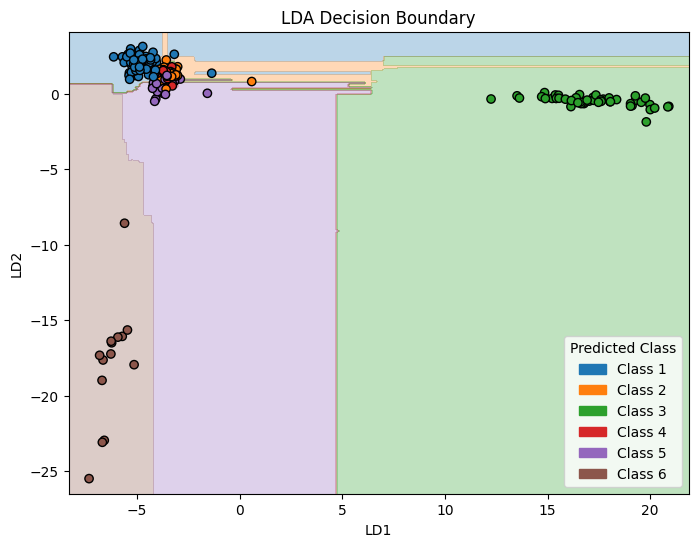

'\ncredits: chatgpt to make the graph work\n\n🧠 What LD1 and LD2 Mean\n\nUnlike PCA:\n\nLD1 = direction that maximizes separation between classes\n\nLD2 = second-best separation direction\n\nSince this is supervised, you should see much cleaner class regions compared to PCA.\n'

In [66]:
# Getting the average accuracy rating
min_seed = 42
max_seed = 52

avg_acc = 0
avg_prob = 0
for i in range(min_seed, max_seed, 1):
    X_train_all, X_test_all, y_train, y_test = train_test_split(X_val_all, y_val, test_size=0.2, random_state=seed,
                                                                stratify=y_val)

    random_forest = RandomForestClassifier(
    n_estimators=num_of_trees,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    n_jobs=-1,
    random_state=i
    )

    random_forest.fit(X_train_all, y_train)

    y_pred = random_forest.predict(X_test_all)

    avg_acc += accuracy_score(y_test, y_pred)


avg_acc /= (max_seed - min_seed)
print(f'\nAverage Accuracy: {avg_acc:.2f}')

print("\n===== LDA 2D Visualization =====")

classes = np.unique(y_train)

# Discrete colormap (6 clear colors)
cmap_light = ListedColormap(plt.cm.tab10.colors[:len(classes)])

# 1️⃣ Scale first (VERY important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val_all)

# 2️⃣ Train/test split (same seed structure)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_val,
    test_size=0.3,
    stratify=y_val,
    random_state=42
)

# 3️⃣ Fit LDA (supervised!)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# 4️⃣ Train random forest in LDA space
model_lda = RandomForestClassifier(
n_estimators=num_of_trees,
max_depth=10,
min_samples_split=2,
min_samples_leaf=1,
max_features="sqrt",
bootstrap=True,
n_jobs=-1,
random_state=42
)
model_lda.fit(X_train_lda, y_train)

# 5️⃣ Accuracy
y_pred_lda = model_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"LDA + random forest Accuracy: {acc_lda:.3f}")

# 6️⃣ Create decision boundary
h = 0.1
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = model_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Background decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Training points
scatter = plt.scatter(
    X_train_lda[:, 0],
    X_train_lda[:, 1],
    c=y_train,
    cmap=cmap_light,
    edgecolor='k'
)

# Create legend manually
handles = []
for i, cls in enumerate(classes):
    color = cmap_light(i)
    handles.append(mpatches.Patch(color=color, label=f"Class {cls}"))

plt.legend(handles=handles, title="Predicted Class")

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title(f"LDA Decision Boundary")
plt.show()

'''
credits: chatgpt to make the graph work

🧠 What LD1 and LD2 Mean

Unlike PCA:

LD1 = direction that maximizes separation between classes

LD2 = second-best separation direction

Since this is supervised, you should see much cleaner class regions compared to PCA.
'''


# Report Random Forest

### What was learned:
Due to not have learned about how to implement a random forest classifications yet, I didn't know how to implement the
classification model so I utilized ChatGPT to guide me through the usage of the sklearn library. From my understanding
of how the random forest classification model works, it puts all the data into a different trees where each tree
trains on a dataset sampled with replacement from the original, resulting in each tree seeing a different mix of rows
 (Some are repeated and some are missing). When the tree is deciding to split, it doesn't use all the features. It
 only considers a random subset (commonly sqrt(d) features for classification). At each node, it tries different
 splits like feature_j <= threashold. It also chooses the split that most improves "purity" (Gini impurity, or Entropy/
 Information gain) of the child nodes. The way the random forest classifier predicts is as such: Given a new input,
 send the input value down every tree. Each tree outputs a class label, the forest returns the class with the
 majority of the votes. The key parameters that may require adjusting within the RandomForestClassification function is
  the n_estimators: which is the number of trees, more usually yields higher accuracy, but it's often much slower,
 max_depth: which limits tree depth; this parameter can be adjusted if the model is overfiting, min_samples_leaf:
 makes the leaves more robust, max_features: how many features to try per split ("sqrt" is often the standard choice
 however you also can choose "log2", an integer to set a hard limit, a float that represents a fraction of
 features), lastly class_weight="balanced" if the classes are imbalanced.

## Results:
This classification model yielded a much higher accuracy when it comes to predicting the disease using the
histopathological features as well as the clinical features, than what the batch gradient decent yielded while only
using the Age feature. The average accuracy was found to be around %96. The way the average accuracy was found was
from looping seed_max - seed_min times. Each loop increased the seed value by 1. That seed value was then used as a
parameter for the random_state within the random forest classifier. Each individual accuracy score was calculated
using the sklearn accuracy_score function, summed up and divided by the number loops conducted (seed_max - seed_min).
The parameters that were used for each of
 the random forest classifier as follows:
   ```
    n_estimators=300,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    n_jobs=-1,
    random_state=(42-52)
   ```

After conducting 3 separate experiments; one experiment where I trained the model using all the features, another
where I trained the model using only the clinic features, and a third one where I trained the model using only
the histopathological features, what I have found was that using all the features gave me the greatest accuracy with
a %97.2 accuracy rate. The dataset where I only used the histopathological features yielded a %92.7 accuracy while
the dataset with only the clinic features yielded an %87.3 accuracy. The top 5 features that yielded the highest
probability for all the features are ['Koebner', 'Fibrosis', 'Clubbing', 'Elongation', 'Thinning']. About (0.0702556 + 0
.08150345 + 0.0936548 + 0.06058227 + 0.07753667) %38.35 of forests impurity reduction came from splits on these 5
features.